1.	La Organización para la Cooperación y el Desarrollo Económico (OECD por sus siglas en inglés) le entrega el dataset orangeec.csv que contiene información recolectada sobre la economía naranja en países de América Latina. Haga un análisis exploratorio de datos para proveer a la OECD con información de valor sobre el impacto de la economía naranja en la región y su relación con otras variables macroeconómicas. Como parte del análisis se puede concluir que el dataset no es el adecuado para la toma de decisiones, para lo cual se debe sustentar la razón. 

In [ ]:
# Importar librerias (Utilizar drive para el dataset, pandas para la manipulción de datos, matplotlib para colores y graficos del dataframe)
from google.colab import drive
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [ ]:
# Importemos para conectar Colab con la información en Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Navegamos a la caparpeta con el contenido
%cd '/content/drive/My Drive/Dataset'

/content/drive/My Drive/Dataset


In [ ]:
# Var a ver qué hay en la carpeta
!ls

df_hist.png  mtcars.csv  orangeec.csv


In [ ]:
 #Creamos un string con el nombre del archivo
ruta_archivo = '/content/drive/My Drive/Dataset/{}'.format('orangeec.csv')
print(ruta_archivo)

/content/drive/My Drive/Dataset/orangeec.csv


In [ ]:
# Usamos el método "to_csv" para exportar el DataFrame a un archivo
df = pd.read_csv(ruta_archivo)

In [ ]:
# Ver el tamaño del DataFrame y su información
print("El tamaño del dataset es ", df.shape, "(filas x columnas)")
df

El tamaño del dataset es  (17, 13) (filas x columnas)


,Country,GDP PC,GDP US bill,GDP Growth %,Services % GDP,Creat Ind % GDP,Inflation,Unemployment,% pop below poverty line,Internet penetration % population,Median age,% pop 25-54,Education invest % GDP
0,Argentina,20900,637.7,2.9,60.9,3.8,25.7,8.1,25.7,93.1,31.7,39.38,5.9
1,Belize,8300,1854.0,0.8,62.2,NaN,1.1,10.1,41.0,52.3,22.7,36.62,7.4
2,Bolivia,7500,37.1,4.2,50.0,NaN,2.8,4.0,38.6,78.6,24.3,37.48,7.3
3,Brazil,15600,2055000.0,1.0,72.8,2.6,3.4,11.8,4.2,70.7,32.0,43.86,5.9
4,Chile,24500,277.0,1.5,64.3,2.2,2.2,7.0,14.4,77.5,34.4,43.08,4.9
5,Colombia,14500,309.2,1.8,61.4,3.3,4.3,10.5,28.0,63.2,30.0,41.91,4.5
6,Costa Rica,16900,58.1,3.2,73.5,2.0,1.6,8.1,21.7,86.7,31.3,44.03,7.1
7,Ecuador,11500,102.3,2.7,56.9,2.0,0.4,4.6,21.5,79.9,27.7,39.59,5.0
8,El Salvador,8900,28.0,2.4,64.9,NaN,1.0,7.0,32.7,57.7,27.1,39.23,3.5
9,Guatemala,8100,75.7,2.8,63.2,NaN,4.4,2.3,59.3,42.1,22.1,34.12,2.8


In [ ]:
# Si queremos ver el total de los datos que componen la base de datos
print("El número total de elementos del DataFrame es:", df.size)

El número total de elementos del DataFrame es: 221


In [ ]:
# Si queremos conocer información sobre las variables numéricas, usamos el método describe
df.describe()

,GDP PC,GDP US bill,GDP Growth %,Services % GDP,Creat Ind % GDP,Inflation,Unemployment,% pop below poverty line,Internet penetration % population,Median age,% pop 25-54,Education invest % GDP
count,17.000000,1.700000e+01,17.000000,17.000000,11.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,14052.941176,1.886930e+05,2.958824,62.635294,3.290909,4.364706,6.794118,27.652941,68.417647,28.276471,39.878824,5.082353
std,6624.303515,5.555371e+05,1.370246,8.311885,2.007712,5.756077,2.489345,13.411055,17.274194,3.893830,2.638077,1.380777
min,5600.000000,1.370000e+01,0.800000,50.000000,1.000000,0.400000,2.300000,4.200000,38.200000,22.100000,34.120000,2.800000
25%,8300.000000,3.710000e+01,2.000000,56.900000,2.000000,1.600000,5.500000,21.700000,57.700000,25.700000,39.230000,4.400000
50%,13300.000000,7.570000e+01,2.800000,62.200000,2.600000,3.400000,6.700000,25.700000,69.700000,28.200000,40.190000,5.000000
75%,19900.000000,3.092000e+02,4.200000,64.900000,3.950000,4.300000,8.100000,32.700000,79.900000,31.300000,41.080000,5.900000
max,25400.000000,2.055000e+06,5.400000,82.000000,7.400000,25.700000,11.800000,59.300000,93.100000,35.000000,44.030000,7.400000


In [ ]:
# Explorando el DataFrame solo hay 6 datos NaN en la columna Creat Ind % GDP, sin embargo no limita el analisis respectivo
pd.isnull(df)

,Country,GDP PC,GDP US bill,GDP Growth %,Services % GDP,Creat Ind % GDP,Inflation,Unemployment,% pop below poverty line,Internet penetration % population,Median age,% pop 25-54,Education invest % GDP
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,False,False,False
9,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
# Si sólo queremos ver el tipo de dato
df.dtypes

Country                               object
GDP PC                                 int64
GDP US bill                          float64
GDP Growth %                         float64
Services % GDP                       float64
Creat Ind % GDP                      float64
Inflation                            float64
Unemployment                         float64
% pop below poverty line             float64
Internet penetration % population    float64
Median age                           float64
% pop 25-54                          float64
Education invest % GDP               float64
dtype: object

In [ ]:
# Si queremos ver el tipo de variable que compone cada columna, la cantidad de valores faltantes, la posición de la columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            17 non-null     object 
 1   GDP PC                             17 non-null     int64  
 2   GDP US bill                        17 non-null     float64
 3   GDP Growth %                       17 non-null     float64
 4   Services % GDP                     17 non-null     float64
 5   Creat Ind % GDP                    11 non-null     float64
 6   Inflation                          17 non-null     float64
 7   Unemployment                       17 non-null     float64
 8   % pop below poverty line           17 non-null     float64
 9   Internet penetration % population  17 non-null     float64
 10  Median age                         17 non-null     float64
 11  % pop 25-54                        17 non-null     float64
 

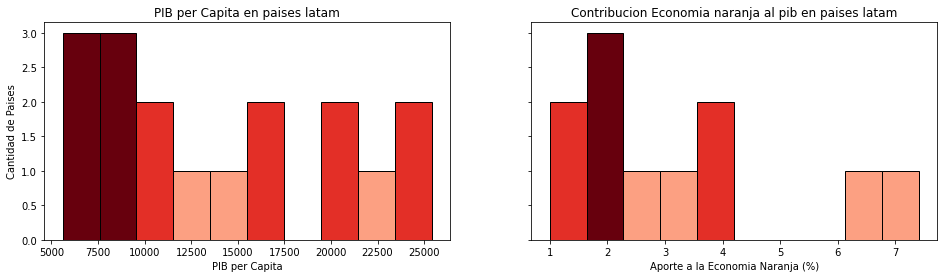

In [ ]:
# Se grafican las frecuencias de los paises del DataFrame vs GDP PC (PIB per Capita en paises latam) y
# Se grafican las frecuencias de los paises del DataFrame vs Creat Ind % GDP (Aporte a la Economia Naranja (%))

def histograma_config(ax_plot, x, title='', x_label='', y_label=''):
    frec, x_bins, patches = ax_plot.hist(x, edgecolor='k', linewidth=1)
    ax_plot.set_xlabel(x_label)
    ax_plot.set_ylabel(y_label)
    ax_plot.set_title(title)

    color_fracs = frec / frec.max()

    color_norm = colors.Normalize(color_fracs.min(), color_fracs.max())
    color_norm

    for frac, patch in zip(color_fracs, patches):
        color = plt.cm.Reds(color_norm(frac))
        patch.set_facecolor(color)
fig, (pib_plot, aporte_plot)= plt.subplots(nrows = 1, ncols = 2, figsize = (16,4), sharey = True)

histograma_config(ax_plot = pib_plot, 
                  x = df['GDP PC'], 
                  title='PIB per Capita en paises latam', 
                  x_label='PIB per Capita', 
                  y_label='Cantidad de Paises')

histograma_config(aporte_plot, df['Creat Ind % GDP'], 
                  'Contribucion Economia naranja al pib en paises latam', 
                  'Aporte a la Economia Naranja (%)')

fig.savefig('df_hist.png')
# https://www.linkedin.com/pulse/an%C3%A1lisis-de-gr%C3%A1ficos-en-la-toma-decisiones-graphic-analysis-chavez

Es impontante resaltar que el impacto de la economía naranja en la región y su relación con otras variables macroeconómicas que el dataset no es adecuado para tomar desiciones, los datos tipo objetos (Conversión a string a partir de pandas 1.0) y una variable numerica solo se permite graficar a traves de histograma de frecuencias. Su alcance solo seria tomar decisiones acerca del punto en que se deben concentrar los esfuerzos para lograr la mejora.

Los histogramas de frecuencias se usan con el objetivo de:

*   Conocer el grado de con que se puede satisfacer los requisitos de calidad.
*   Establecer o modificar las especificaciones del artículo y el nivel de calidad aceptable (NCA)
*   Determinar los aspectos del proceso (ajuste y variabilidad) sobre los que se debe actuar para lograr la calidad deseada.
*   Conocer la presencia de causas asignables (ajenas del proceso), lo que permite detectar y tomar las medidas correctivas necesarias para eliminarlas.


Finalmente la limitacións seria a este tipo de graficas y un solo analisis posible y la desición estaria limitada a un solo factor macro-economico.







